In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

### Probe frequency: 300 Hz

#### O1

In [19]:
dfo1run1_300 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/delays-from-all-runs/Run1.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run2_300 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/delays-from-all-runs/Run2.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run3_300 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/delays-from-all-runs/Run3.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run4_300 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/delays-from-all-runs/Run4.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run5_300 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/delays-from-all-runs/Run5.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run6_300 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/delays-from-all-runs/Run6.txt',
                           delimiter=' ' , dtype= np.float64)

In [20]:
dfO1_300 = pd.concat([dfo1run1_300['Delays'], dfo1run1_300['Time-delay1'], dfo1run2_300['Time-delay2'], dfo1run3_300['Time-delay3'], 
                  dfo1run4_300['Time-delay4']], axis=1)
dfO1_300 = dfO1_300.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1_300 = pd.concat([dfO1_300, dfo1run5_300['Time-delay1'], dfo1run6_300['Time-delay2']], axis=1)
dfO1_300 = dfO1_300.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6"}, 
                   errors="raise")

In [26]:
dfO1_300['mean'] = dfO1_300.iloc[:, 1:7].mean(axis=1)
dfO1_300['std'] = dfO1_300.iloc[:, 1:7].std(axis=1)

In [27]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6']

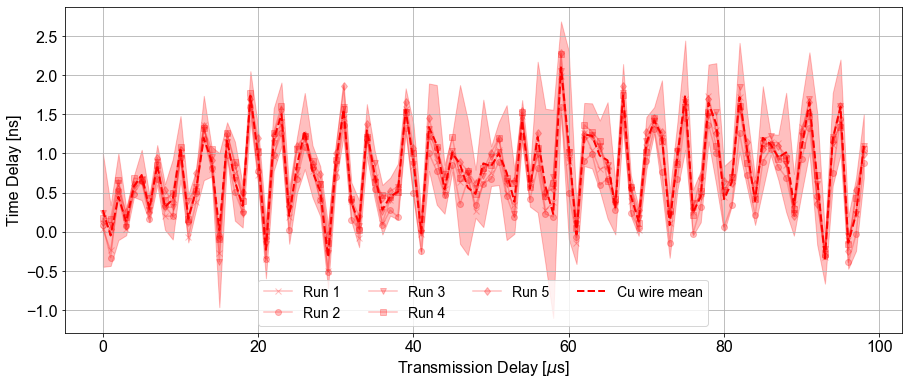

In [29]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1_300['Delays_Full'], dfO1_300[r], p, label = l, 
          alpha = 0.25, color = 'r') for r, p, l in zip(dfO1_300.keys()[2:7], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO1_300['Delays_Full'], dfO1_300['mean'], '--', color = 'r', label = 'Cu wire mean', linewidth = 2)
plt.fill_between(dfO1_300.index, dfO1_300['mean'] - 2*dfO1_300['std'], dfO1_300['mean'] + 2*dfO1_300['std'],
                alpha=.25, color = 'r')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Cement-Samples/Probe-Frequency-Testing/Cu-wires_5mm_O1_300Hz.jpg', 
#             dpi=300, bbox_inches='tight', format='jpg')
plt.show()

### Probe frequency: 400 Hz

#### O1

In [31]:
dfo1run1_400 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/delays-from-all-runs/Run1.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run2_400 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/delays-from-all-runs/Run2.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run3_400 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/delays-from-all-runs/Run3.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run4_400 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/delays-from-all-runs/Run4.txt',
                           delimiter=' ' , dtype= np.float64)
dfo1run5_400 = pd.read_csv('../Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/delays-from-all-runs/Run5.txt',
                           delimiter=' ' , dtype= np.float64)

In [32]:
dfO1_400 = pd.concat([dfo1run1_400['Delays'], dfo1run1_400['Time-delay1'], dfo1run2_400['Time-delay2'], 
                      dfo1run3_400['Time-delay3'], dfo1run4_400['Time-delay4']], axis=1)
dfO1_400 = dfO1_400.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2",
                                    "Time-delay3": "Run3", "Time-delay4": "Run4"}, errors="raise")
dfO1_400 = pd.concat([dfO1_400, dfo1run5_400['Time-delay1']], axis=1)
dfO1_400 = dfO1_400.rename(columns={"Time-delay1": "Run5"}, errors="raise")

In [33]:
dfO1_400['mean'] = dfO1_400.iloc[:, 1:6].mean(axis=1)
dfO1_400['std'] = dfO1_400.iloc[:, 1:6].std(axis=1)

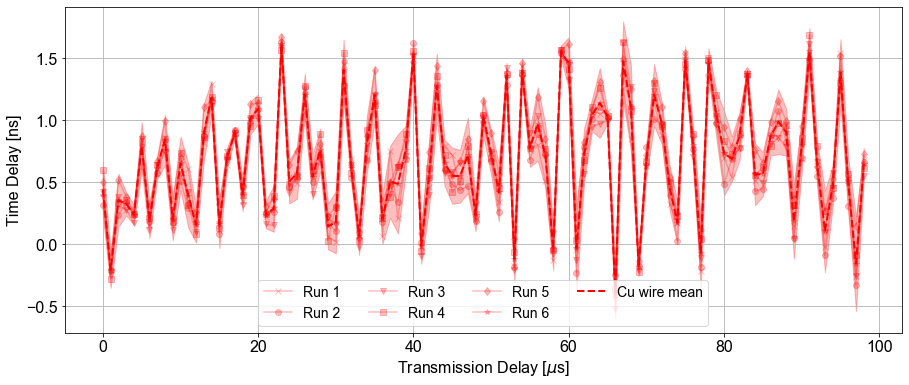

In [35]:
plt.figure(figsize=(15,6))
[plt.plot(dfO1_400['Delays_Full'], dfO1_400[r], p, label = l, 
          alpha = 0.25, color = 'r') for r, p, l in zip(dfO1_400.keys()[1:7], ['-x', '-o', '-v', '-s', '-d', '-*'], labels)]
plt.plot(dfO1_400['Delays_Full'], dfO1_400['mean'], '--', color = 'r', label = 'Cu wire mean', linewidth = 2)
plt.fill_between(dfO1_400.index, dfO1_400['mean'] - 2*dfO1_400['std'], dfO1_400['mean'] + 2*dfO1_400['std'],
                alpha=.25, color = 'r')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
plt.legend(loc='lower center', fontsize=14, ncol = 4)
plt.savefig('c:/users/Jacob/Nonlinearity/Images/Cement-Samples/Probe-Frequency-Testing/Cu-wires_5mm_O1_400Hz.jpg', 
            dpi=300, bbox_inches='tight', format='jpg')
plt.show()